# Naive Bayes

Naive Bayes is a classification algorithm based on Bayes' Theorem. There are 2 Naive Bayes classification methods.
-  Multinormial Naive Bayes Classification
-  Gaussian Naive Bayes Classification

**Key concepts**

    1. Conditional Probability - The chance of some outcome occurs given some knowledge of the particular event.
    2. Bayes Theroem - Bayes' Theorem is a theorem closely related to Conditional Probability.



## Gaussian Naive Bayes Classification

**Why is it called by this name?**
> The training dataset is represented using the Gaussian(Normal) distribution. Hence it is named as Gaussian Naive Bayes Classification

### Installing Necessary Libraries

If you have **not** installed `numpy`,`pandas`,`scikit-learn`,`matplotlib` and `seaborn` libraries before, please run the below cell by removing the `#`.

In [1]:
#!pip install numpy pandas scikit-learn matplotlib seaborn

### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Loading the Dataset

<font size="3">For simplicity and explanational purposes, we will be using the Iris dataset which is included in the Scikit-learn library

<font size="3">The Iris dataset is a famous dataset for pattern recognition. It includes 150 samples of iris flowers from three species (Iris setosa, Iris versicolor, and Iris virginica). Each sample has four features: sepal length, sepal width, petal length, and petal width.

In [3]:
# Load the Iris dataset
iris = load_iris()

# Create a pandas DataFrame for easier data manipulation
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

### Viewing the Dataset

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Visualising Data

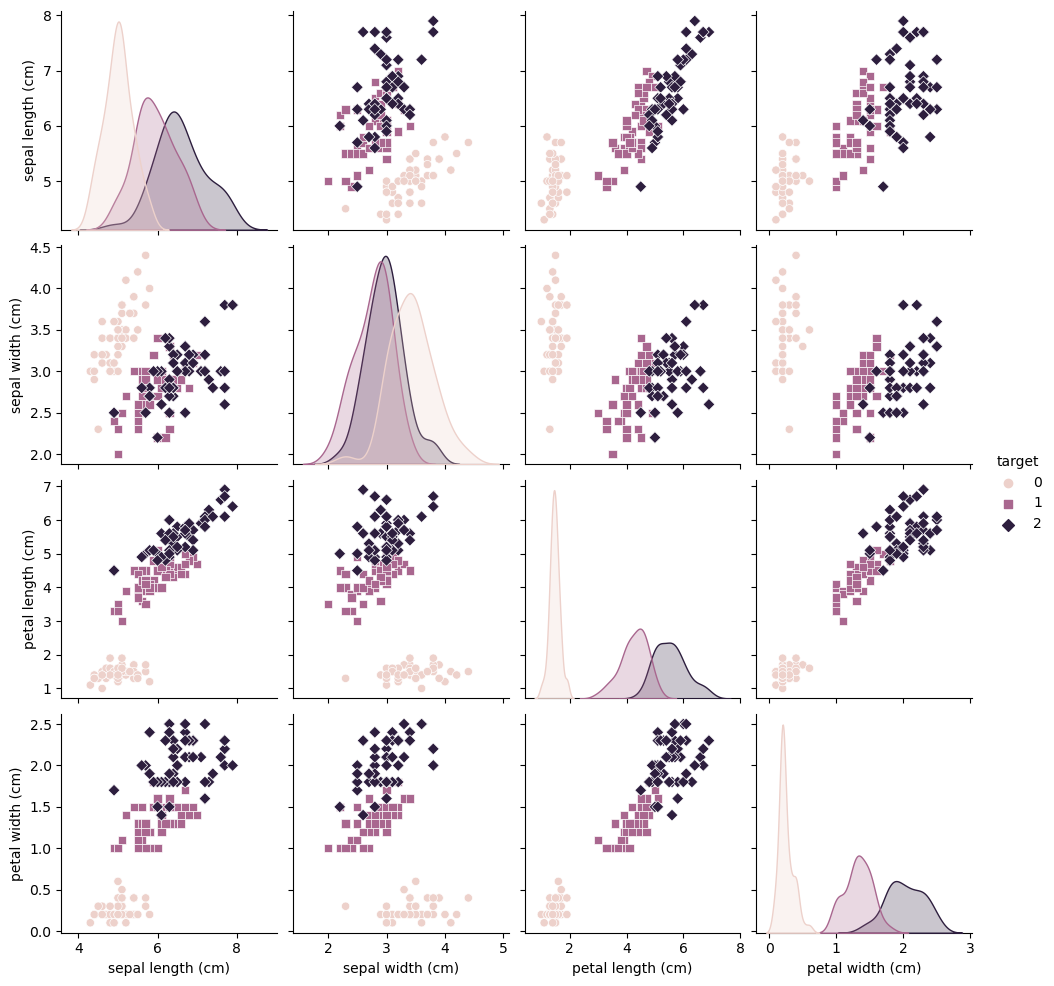

In [5]:
# Pairplot to visualize the data
sns.pairplot(data, hue='target', markers=["o", "s", "D"])
plt.show()

### Data Preprocessing

Before training the SVM model, we need to preprocess the data. This involves **splitting the data into training and testing sets** the feature values.

#### Defining Features and Target

In [6]:
X = data[iris.feature_names]
y = data['target']

#### Split the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Purpose:** This command splits the dataset into training and testing sets.

**Explanation:**
- `train_test_split(X, y, test_size=0.2)`: This function from the scikit-learn library splits the feature matrix (`X`) and target vector (`y`) into training and testing subsets.
- `X_train` and `y_train`: These will hold the training data (80% of the dataset if `test_size=0.2`).
- `X_test` and `y_test`: These will hold the testing data (20% of the dataset if `test_size=0.2`).
- `test_size=0.2`: This parameter specifies that 20% of the data should be used for testing, and the remaining 80% will be used for training.
- `random_state=42` :  Controls the shuffling applied to the data before applying the split.
    Passing an integer will give reproducible output across multiple function calls.

### Training the Gaussian Naive Bayes Model

Now, we will train the Gaussian Naive Bayes model using the training data. We'll use the **GaussianNB()** class from **scikit-learn.naive_bayes**.

In [8]:
# Initialize the model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

GaussianNB()

### Making Predictions

After training the model, we can use it to make predictions on the test data.

In [9]:
# Make predictions on the test data
y_pred = gnb_model.predict(X_test)

### Evaulating the Model

To evaluate the performance of the SVM model, we will use metrics like accuracy, confusion matrix, and classification report.

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.6f}%")

Accuracy: 100.000000%


Confusion Matrix


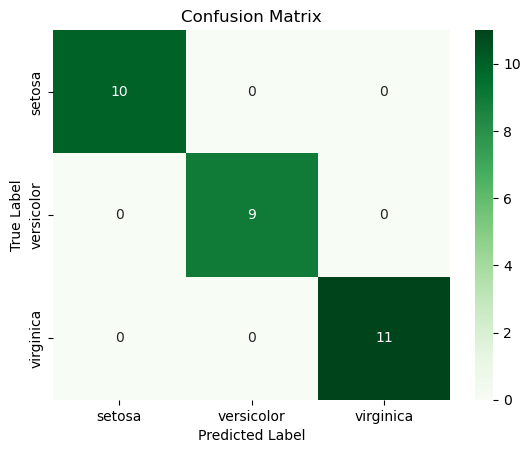

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
#plotting the confusion matrix as a heat map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Generate classification report
cls_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report")
print(cls_report)


Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

